# SHAP Plot from saved SHAP Values

In this notebook saved shap values is used to plot formatted barplot and violin plot as per requirement 

to check how to get shap values check out shap_plots.ipynb notebook

annealing


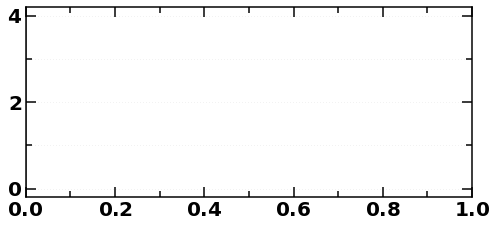

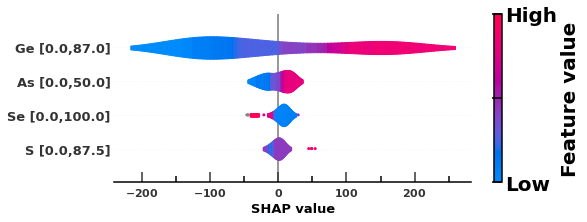

BulkModulus


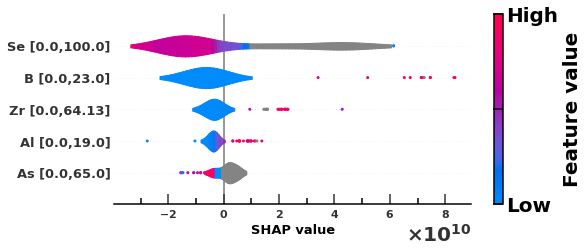

Density


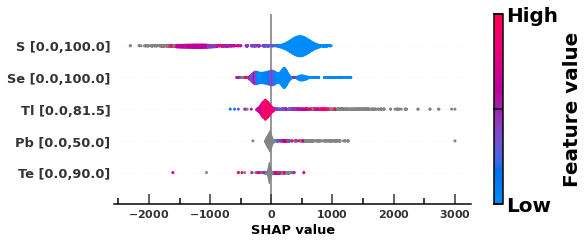

Littleton


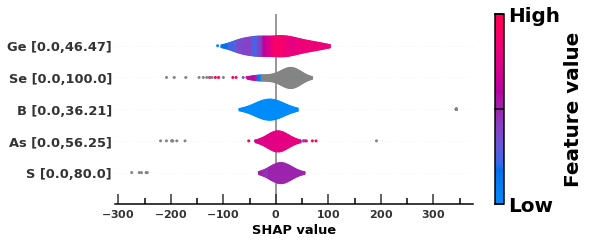

ND


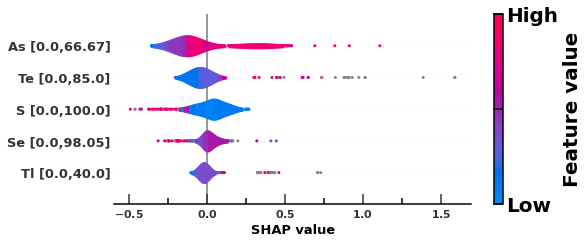

Shear_modulus


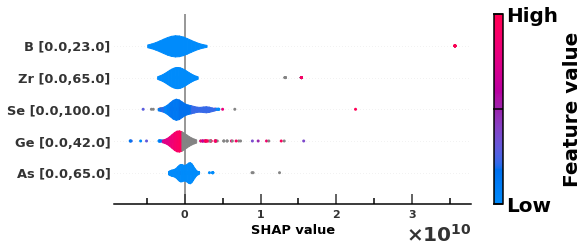

softening


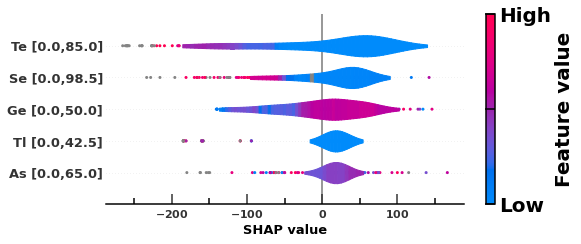

TEC


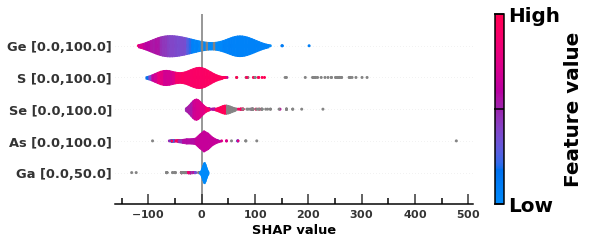

TG


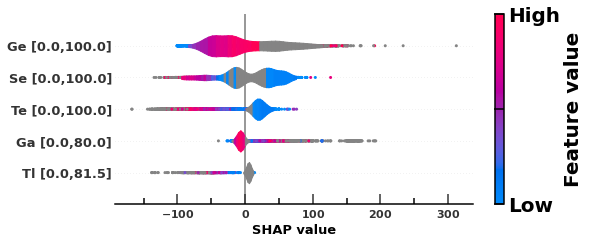

TLiq


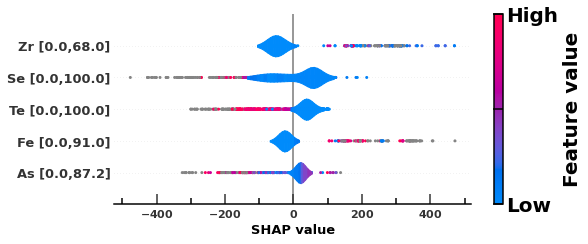

YM


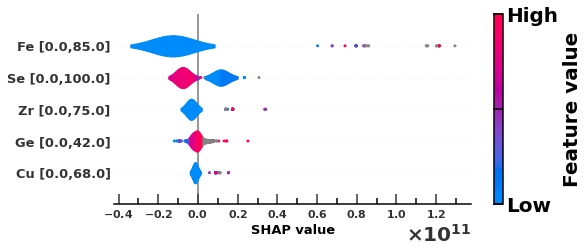

Hardness_RT


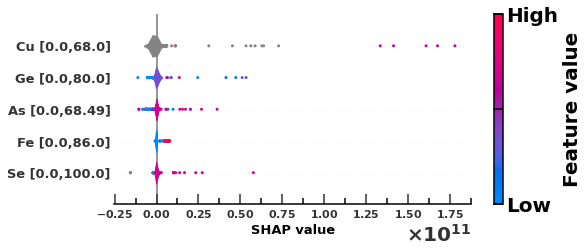

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np 
from ipykernel import kernelapp as app
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import optuna
import sklearn
from sklearn import datasets
from sklearn.svm import SVR
import optuna 
import shap
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import os
import pickle
from new_plot import *
set_things()
set_font()

b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'Shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

for prop in b:
    
    # loading data
    path = r'/data/'
    file = prop+'_shapvalue.pkl' 



    propfile =  prop +'.csv'
     
    df = pd.read_csv(propfile)
    a=df 
    
    # renaming labels 
    old_col = df.columns.tolist()
    new_col= {}
    for c in old_col:
        new_col[c] = c + str(" [" + str(np.round(a[c].min(),2))+','+str(np.round(a[c].max(),2)) + "]")
    df = df.rename(columns= new_col)

    data = df.values
    
    # data splitting 
    X_features = data[:,0:-1]
    Y_properties = data[:,-1]

    sa = df.columns.values.tolist()
    sa = list(sa[:-1])
    a10 = sa

    # X = pd.DataFrame(data = X_features,columns = a10)
    # Y = pd.DataFrame(data = Y_properties, columns = [propcolumnname])

    X_tr,X_shap,Y_tr,Y_shap = train_test_split(X_features,Y_properties,test_size=0.8, random_state=42)
    X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_properties,test_size=0.2, random_state=33)

    # loading shap values
    shap_values = pickle.load(open(file, "rb"))
    print(prop)
    
    # plotting bar plots
    
#     
    shap.initjs()
    fig,ax = plt.subplots(figsize=(6,6))
    # shap.summary_plot(shap_values, X_shap,feature_names=a10, plot_type='bar',show=False)
    shap.summary_plot(shap_values, show=False, plot_type='bar',feature_names=df.columns.tolist() , max_display=5)
    plt.xlabel('mean|SHAP value|')#+propcolumnname)
    plt.savefig('bar_plot_final2/'+prop+'bar_plot2.png',dpi=1200,bbox_inches='tight')
    
    
    print(prop)
    # plotting violin plots
    fig,ax = plt.subplots(figsize=(6,6))

    shap.summary_plot(shap_values, X_shap ,feature_names= df.columns.tolist() ,  max_display=5, plot_type='violin',show=False,
                     color_bar=False)
    plt.xlabel('SHAP value')
    cbar = plt.colorbar()
    cbar.set_label('Feature value')
    cbar.minorticks_off()
    #cbar.ax.set_axis_off()
    midpoint_cbar = (cbar.vmax + cbar.vmin)/2
    cbar.set_ticks([cbar.vmax,midpoint_cbar,cbar.vmin])#,labels=['High','Low'])
    cbar.set_ticklabels(['High','','Low'])
    plt.savefig('violin_plot_final2/'+prop+'final_violin_plot.png',dpi=1200,bbox_inches='tight')
    plt.show()
